How do stress levels vary across different industries in remote work environments?

To answer this question and otherwe used the provided data set. To effectively answer the question, we needed to compare stress levels across different work locations as well, which is why we chose to include onsite, hybrid, and remote. Filtering the data was not enough by itself as stress levels were represented by "low", "medium", and "high". Do make this information usable it needed mapped to numerical values, and averaged for each work location to its respective industry. Once the new dataframe was constructed and unstacked we were able to easily plot our values and see that most of the stress levels were consistent across the industries, however working remote added more stress overall to jobs.



In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
remote_work = Path("Resources/remote_work.csv") #set path to file
remote_work_df = pd.read_csv(remote_work) #create dataframe containing CSV
remote_work_df.head() #print sample of dataframe

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [3]:
NorthAmerica_df = remote_work_df[(remote_work_df["Region"] == "North America")] #create new dataframe with the "north America" filter
NorthAmerica_df["Stress_Level"] = NorthAmerica_df["Stress_Level"].map({"Low": 1, "Medium": 2, "High": 3}) #map stress levels to numerical values
NorthAmerica_df.head() #print new dataframe

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,2,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,3,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,2,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,1,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America
13,EMP0014,51,Non-binary,Designer,Manufacturing,5,Hybrid,45,13,1,1,Anxiety,No,Decrease,2,Satisfied,5,Weekly,Poor,North America


In [4]:
Industry_Stress = NorthAmerica_df.groupby(["Industry", "Work_Location"])["Stress_Level"].mean().round(2).unstack() #filter data into new dataframe , round to 2 places and unstack
Industry_Stress.head(10)

Work_Location,Hybrid,Onsite,Remote
Industry,,,
Consulting,1.94,2.21,2.00
Education,2.18,1.98,2.00
Finance,2.17,1.90,2.02
Healthcare,1.92,1.90,2.25
IT,1.89,2.00,1.83
Manufacturing,1.97,1.82,2.05
Retail,1.90,1.98,1.72


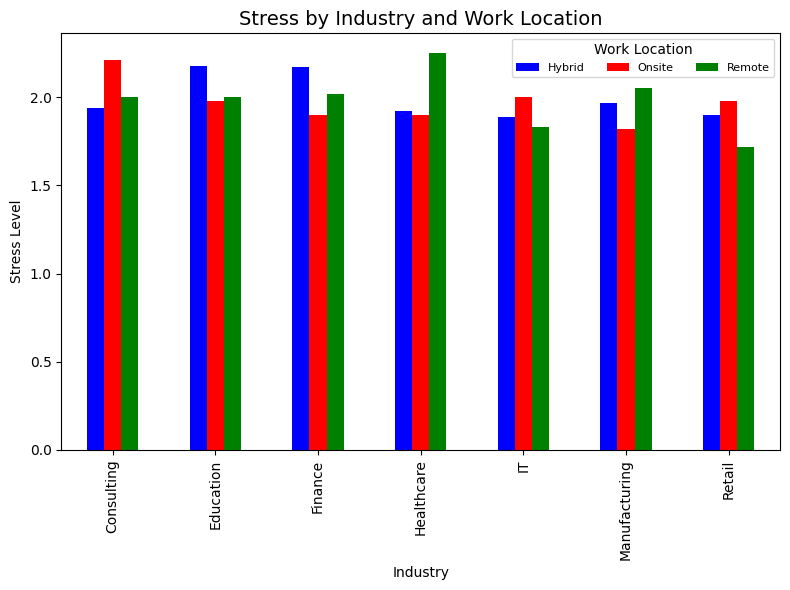

In [5]:
chart = Industry_Stress.plot(color=["Blue", "Red", "Green"], kind="bar", figsize=(8,6))
chart.set_xlabel("Industry")
chart.set_ylabel("Stress Level")
plt.title("Stress by Industry and Work Location", fontsize=14)
plt.legend(loc="upper right", fontsize=8, ncol = 3, title=("Work Location"))
plt.subplots_adjust(top=.8)
plt.tight_layout()
plt.savefig("Stress by Industry.png", bbox_inches="tight")
plt.show()
